# Lab 9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy as sp
from sklearn.metrics import f1_score

Ilosc przykladow: 307, ilosc cech: 2


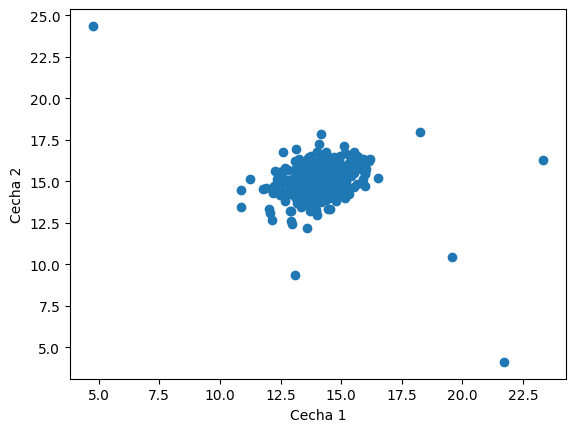

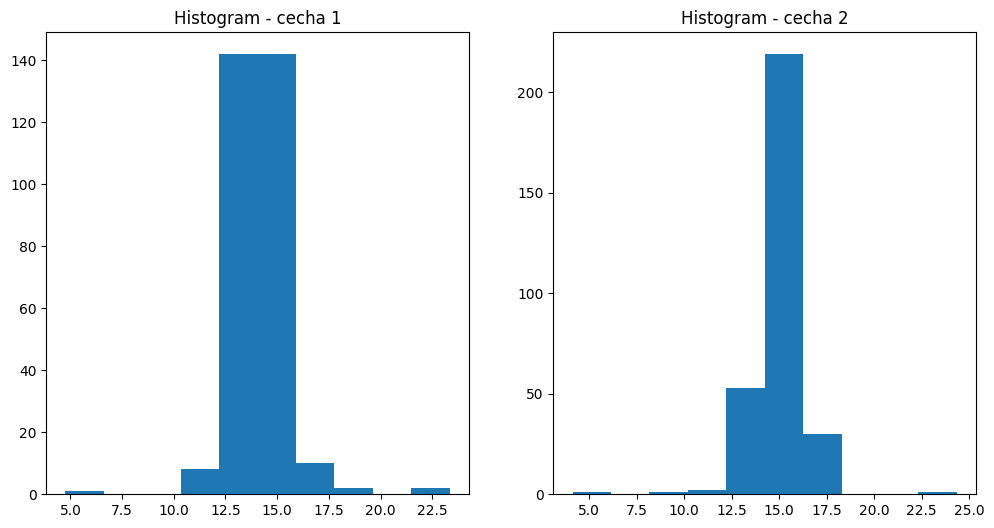

In [2]:
data = loadmat('ex8data1.mat')
X = data['X']
(m, n) = X.shape
print(f"Ilosc przykladow: {m}, ilosc cech: {n}")

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.show()

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
ax[0].hist(X[:, 0])
ax[0].set_title("Histogram - cecha 1")
ax[1].hist(X[:, 1])
ax[1].set_title("Histogram - cecha 2")
plt.show()

### Rozklad Gaussa

In [3]:
def estimate_gaussian(X):
    sigma = np.std(X, axis=0)
    mu = np.mean(X, axis=0)

    return mu, sigma

### Wyznaczenie wartości rozkładu prawdopodobieństwa

In [4]:
Xval = data['Xval']
yval = data['yval']

print(f"Ilosc probek przyporzadkowanych do klasy 1: {np.count_nonzero(yval)}")

Ilosc probek przyporzadkowanych do klasy 1: 9


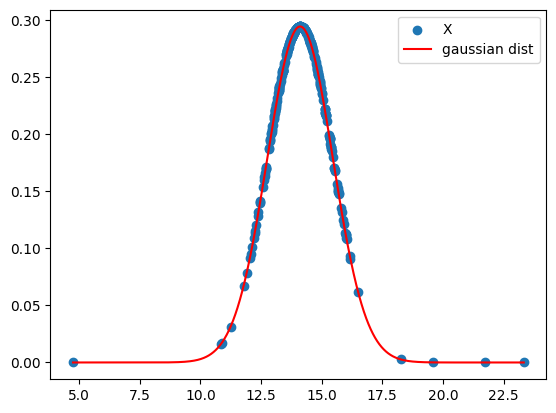

In [5]:
mu, sigma = estimate_gaussian(X)

values_line = np.arange(X[:, 0].min(), X[:, 0].max(), 0.01)
gauss_values_line = sp.stats.norm.pdf(values_line, loc=mu[0], scale=sigma[0])

gauss_values = sp.stats.norm.pdf(X, loc=mu, scale=sigma)

plt.scatter(X[:, 0], gauss_values[:, 0])
plt.plot(values_line, gauss_values_line, "-r")
plt.legend(["X", "gaussian dist"])
plt.show()

p_val = sp.stats.norm.pdf(Xval, loc=mu, scale=sigma)

### Wyznaczanie progu

In [27]:
def does_belong(X, eps):
    result = []

    for x in X:
        if x < eps:
            result.append(1)
        else:
            result.append(0)

    return result


def select_threshold(pval, yval, feature):
    best_epsilon = 0
    best_f1 = 0
    p_min = 0; p_max = 0.1; n = 1000

    pval_fn = pval[:, feature]

    p_samples = np.linspace(p_min, p_max, n, endpoint=True)

    for p in p_samples:
        y_pred = does_belong(pval_fn, p)

        new_f1 = f1_score(yval, y_pred)

        if new_f1 > best_f1:
            best_f1 = new_f1
            best_epsilon = p

    return best_epsilon, best_f1

In [29]:
eps, f1 = select_threshold(p_val, yval, 0)
print(f"Najlepiej dla progu {eps} i f1 wtedy wynosi {f1}")





Najlepiej dla progu 0.0004004004004004004 i f1 wtedy wynosi 0.8
